In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# X = [1, 2, 3, 4] <=> [x0, x1, x2, x3]
# Y = [2] <=> w_init + w_0 * x0 + ... + w_3 * x3

# Fake X data
X_data = np.random.random((10000, 2))

# Fake sample weights
sample_weights = np.array([3, 4]).reshape(2,)

# Fake y_data
y_data = np.matmul(X_data, sample_weights)

In [3]:
print(X_data[0])
print(y_data[0])

[ 0.91638727  0.77603208]
5.85329012755


In [4]:
# Approximation Y

y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))
y_data[0]

6.128456767194491

In [8]:
y_data = y_data.reshape(len(y_data), 1)
y_data.shape

(10000, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(8000, 2)

In [15]:
X = tf.placeholder(tf.float32, [None, X_train.shape[1]])
y = tf.placeholder(tf.float32, [None, 1])

In [19]:
W = tf.Variable(tf.ones([X_train.shape[1], 1]))
b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [20]:
pred = tf.add(tf.matmul(X, W), b)

In [23]:
loss = tf.reduce_mean(tf.square(pred - y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [24]:
init = tf.global_variables_initializer()

In [25]:
sess = tf.Session()

In [34]:
# Training 
sess.run(init)

epochs = 5000
loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X: X_train, y: y_train})
    test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 500 == 0:
        print('Epoch {} test loss = {}'.format(epoch, test_loss))
        
print('Training finished')

Epoch 0 test loss = 5.439452648162842
Epoch 500 test loss = 0.17688138782978058
Epoch 1000 test loss = 0.058148838579654694
Epoch 1500 test loss = 0.019288957118988037
Epoch 2000 test loss = 0.00643226457759738
Epoch 2500 test loss = 0.00215154723264277
Epoch 3000 test loss = 0.0007209485047496855
Epoch 3500 test loss = 0.0002418335498077795
Epoch 4000 test loss = 8.117168181343004e-05
Epoch 4500 test loss = 2.7256151952315122e-05
Training finished


In [35]:
sess.run(W)

array([[ 2.99283361],
       [ 3.99247599]], dtype=float32)

In [36]:
sess.run(b)

0.28292465

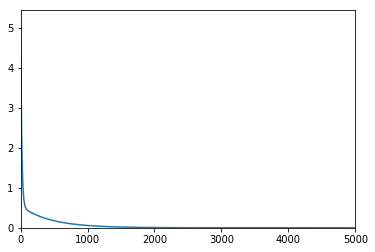

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [38]:
pred_y = sess.run(pred, feed_dict={
    X : [[2, 3]]
})

print(pred_y)

[[ 18.24602127]]
